# Assignment 2
## CSC 478 Programming Machine Learning Applications
Siravich Khongrod

## Question 1

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a) Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function. 

In [449]:
def knn_search(dataPt, dataMat, K, measure):
    if measure == 0: # euclidean distances
        dists = np.sqrt(((dataMat - dataPt)**2).sum(axis=1))
    elif measure == 1: # cosine similarity
        D_norm = np.array([np.linalg.norm(dataMat[i]) for i in range(len(dataMat))])
        x_norm = np.linalg.norm(dataPt)
        sims = np.dot(dataMat,dataPt)/(D_norm * x_norm)
        dists = 1 - sims

    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], sorted(dists)[:K]


b. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

1. trainMatrixModified.txt: the term-document frequency matrix for the training documents. Each row of this matrix corresponds to one the terms and each column corresponds to one the documents and the (i,j)th element of the matrix shows the frequency of the ith term in the jth document. This matrix contains 5500 rows and 800 columns.

2. testMatrixModified.txt: the term-document frequency for the test documents. The matrix contains 5500 rows and 200 columns.

In [450]:
# term-doc
trainDF = pd.read_csv('trainMatrixModified.txt',sep='\t',header=None)
trainDT = trainDF.T

testDF = pd.read_csv('testMatrixModified.txt',sep='\t',header=None)
testDT = testDF.T

trainClassDF = pd.read_csv('trainClasses.txt',sep='\t',header=None)
testClassDF = pd.read_csv('testClasses.txt',sep='\t',header=None)

trainClassDF = trainClassDF.iloc[:,1]
testClassDF = testClassDF.iloc[:,1]

testSet = testDT
testSet = np.array(testSet)
neigh_idx, distances = knn_search(testDT.iloc[1],trainDT,3,0)

In [451]:
def knn_classify (dataPt, trainCase, trainClass, K, measure):
    neigh_idx, distances = knn_search(dataPt, trainCase, K, measure)
    neigh_labels = trainClass.iloc[neigh_idx]
    return neigh_labels.mode()

def knn_eval (testCase, testClass, trainCase, trainClass, K, measure):
    knn_hit=0
    for i in range(testClass.size):
        knn_label = knn_classify(testCase.iloc[i],trainCase,trainClass,K,measure)
        #debug: stopper
        if(i==54):
            break
    #     print (testClassDF.iloc[i],knn_label[0],testClassDF.iloc[i]==knn_label)

        if(testClass.iloc[i]==knn_label[0]):
            knn_hit+=1
    #division operator will return integer output for py27
    return knn_hit*100.0/testClass.size

acc = knn_eval(testDT,testClassDF,trainDT,trainClassDF,3,0)
print acc        
# print("accuracy",knn_hit*100.0/testClassDF.size)


23.0



C. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [452]:
acc_euclidian = []
acc_cosine = []

i = 1
while i <= 20:
    acc_euclidian.append(knn_eval(testDT,testClassDF,trainDT,trainClassDF,i,0))
    acc_cosine.append(knn_eval(testDT,testClassDF,trainDT,trainClassDF,i,1))
    i+=1
#make 2D array 
# row: acc
# c1: euclidian
# c2: cosine

[19.0, 21.0, 23.0, 20.5, 22.5, 20.0, 21.5, 20.0, 20.5, 19.0, 22.0, 19.5, 21.5, 20.0, 21.0, 20.0, 20.5, 20.0, 20.0, 18.5]
[18.5, 16.5, 24.0, 23.5, 25.0, 24.5, 25.0, 25.0, 25.0, 25.0, 25.5, 25.0, 25.5, 25.0, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5]


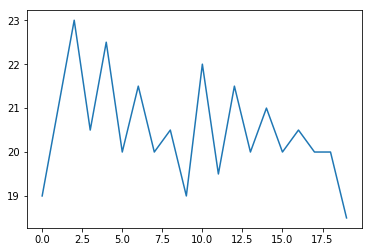

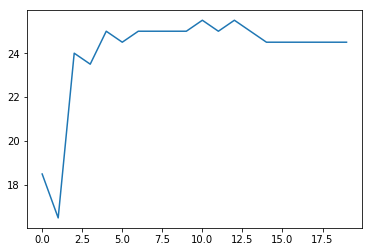

In [453]:
print acc_euclidian
print acc_cosine
plt.plot(acc_euclidian)
plt.show()
plt.plot(acc_cosine)
plt.show()

d. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [218]:
# modify the training and test data
numTerms=trainDF.shape[0]
NDocs = trainDF.shape[1]

DF = np.array([(trainDF!=0).sum(1)]).T
DF.shape

# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(trainDF), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
# print NMatrix
IDF = np.log2(np.divide(NMatrix, DF))
TD_tfidf = trainDF * IDF

pd.set_option("display.precision", 2)
TD_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89


In [220]:
acc = knn_eval(testDT,testClassDF,TD_tfidf.T,trainClassDF,3,0)

In [221]:
acc

52.0

e. Create a new classifier based on the Rocchio Method adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classifiation function. 
The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. 
The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier. 

In [579]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

def rocchio_train(train, trainClass):
    model = []
    for i in set(trainClass):
        model.append(train[trainClass==i].sum(0))
    return model

model = rocchio_train(trainDT,trainClassDF)

pred_class = []
pred_similarity = []
i=0
while i < testDT.shape[0]:
    pred = []
    for x in range(len(model)):
        pred.append(cos_sim(testDT.iloc[i],model[x]))
    i+=1
    pred_class.append(pred.index(max(pred)))
    pred_similarity.append(max(pred))

print sum(testClassDF==pred_class)
print testClassDF.shape[0]
from __future__ import division
 
print sum(testClassDF==pred_class)/testClassDF.shape[0]
# print max(pred), pred.index(max(pred))


[0.4412988961200159, 0.2872771676504734, 0.15694376511927788, 0.16666148423198068, 0.332881157733716, 0.2975526149202652, 0.18226800689278158, 0.3837428701814553, 0.2306619682889135, 0.2907156970633075, 0.3592218082030027, 0.2620381264844315, 0.161912440548264, 0.24257301224214506, 0.34258990002048734, 0.26878055278210505, 0.27668952283662585, 0.17362102095802465, 0.18098692393036095, 0.19449654666822166, 0.3634711481602564, 0.14553759042793551, 0.2273196731746918, 0.45138768369527404, 0.4017262231922455, 0.2143965505475715, 0.4458323345369831, 0.26510855094460845, 0.2578018318703925, 0.1154129776928036, 0.22653234959993634, 0.19857647310062915, 0.284117173537662, 0.367171235296633, 0.1844409236460665, 0.18825543462090386, 0.18450209105226162, 0.12492369077347325, 0.14908305208803657, 0.25510188949823154, 0.14335354562274255, 0.23054085583052183, 0.1511659525722096, 0.20553346378424958, 0.191019641223078, 0.47293627924599557, 0.3548436322422319, 0.2701279768100961, 0.2695592057952024, 

In [410]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(trainDT,trainClassDF)
# clf.predict(trainDT,trainClassDF)
# clf.predict(testDT,testClassDF)
# testClassDF.shape
clf_pred = clf.predict(np.array(testDT))
# clf_pred==testClassDF
print(classification_report(clf_pred, testClassDF))
print confusion_matrix(clf_pred, testClassDF) #94%

             precision    recall  f1-score   support

          0       0.88      1.00      0.94        87
          1       1.00      0.89      0.94       113

avg / total       0.95      0.94      0.94       200

[[ 87   0]
 [ 12 101]]
188
200


## Classification using scikit-learn [Dataset: bank_data.csv]
#### For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

Your tasks in this problem are the following:

a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [232]:
import pandas as pd
import numpy as np

bankdata = open("bank_data.csv", "r")
bankdata = pd.read_csv('bank_data.csv')
bankdata.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [233]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

# vs_matrix = 
bank_binarized = pd.get_dummies(bankdata, columns= ['car','pep','gender','region','married','savings_acct','current_acct','mortgage'])
# bank_binarized = pd.get_dummies(bank_binarized, columns=('pop_NO','gender_FEMALE','')
bank_binarized = bank_binarized.drop(['id'],axis=1)
bank_binarized.head()

from sklearn.cross_validation import train_test_split
train, test, trainClass, testClass = train_test_split(bank_binarized, bankdata['pep'], test_size=.2, random_state=33)
# train.head()

min_max_scaler = preprocessing.MinMaxScaler().fit(train)
train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)

print (train.shape,train_norm.shape)
print (test.shape,test_norm.shape)
test_norm[0:5]

# SPLIT FOR TRAINING-TESTING
# from sklearn.cross_validation import train_test_split

# random state 33 -> next run will get same sets
# vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)


((480, 21), (480L, 21L))
((120, 21), (120L, 21L))


array([[0.28571429, 0.12269342, 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.83673469, 0.41475008, 0.33333333, 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        ],
       [0.87755102, 0.62135545, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.71428571, 0.75088804, 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.       

b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [431]:
from sklearn import neighbors, tree, naive_bayes

knnpreds_test = knnclf.predict(test_norm)
# print knnpreds_test # ==testClass
n_neighbors=1
while n_neighbors <= 5:
    print "neighbors: " , n_neighbors
    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') # weights = 'uniform'
    knnclf.fit(train_norm, trainClass)
    print "train: " , knnclf.score(train_norm, trainClass)
    print "test: " , knnclf.score(test_norm, testClass)
    n_neighbors+=2

n_neighbors=1
while n_neighbors <= 5:
    print "neighbors: " , n_neighbors
    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform') # weights = 'uniform'
    knnclf.fit(train_norm, trainClass)
    print "train: " , knnclf.score(train_norm, trainClass)
    print "test: " , knnclf.score(test_norm, testClass)
    n_neighbors+=2

neighbors:  1
train:  1.0
test:  0.9833333333333333
neighbors:  3
train:  1.0
test:  1.0
neighbors:  5
train:  1.0
test:  1.0
neighbors:  1
train:  1.0
test:  0.9833333333333333
neighbors:  3
train:  0.9979166666666667
test:  1.0
neighbors:  5
train:  1.0
test:  1.0


With number of neighbor = 3, it is suffucient for the distance weighted classifier to correctly classify all records.

In [432]:
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') # weights = 'uniform'
knnclf.fit(train_norm, trainClass)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [433]:
from sklearn.metrics import classification_report
print(classification_report(testClass, knnpreds_test))

             precision    recall  f1-score   support

         NO       1.00      1.00      1.00        66
        YES       1.00      1.00      1.00        54

avg / total       1.00      1.00      1.00       120



In [434]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(testClass, knnpreds_test)
print knncm
print "accuracy"
print knnclf.score(train_norm, trainClass)
print knnclf.score(test_norm, testClass)

[[66  0]
 [ 0 54]]
accuracy
1.0
1.0


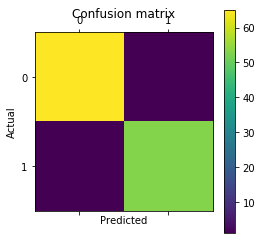

In [9]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

c. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

1.0
1.0
             precision    recall  f1-score   support

         NO       1.00      1.00      1.00        66
        YES       1.00      1.00      1.00        54

avg / total       1.00      1.00      1.00       120

[[66  0]
 [ 0 54]]


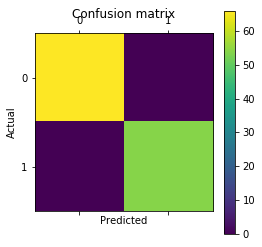

In [238]:
# no need to normalize or use dummies for DT
# treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(train, trainClass)
treepreds_test = treeclf.predict(test)
# print treepreds_test

print treeclf.score(test, testClass)
print treeclf.score(train, trainClass)
print(classification_report(testClass, treepreds_test))
# np.array(testClass)
treecm = confusion_matrix(np.array(testClass), treepreds_test)#, labels=['Yes','No'])
# treecm = confusion_matrix(testClass, treepreds_test, labels=['Yes','No'])
print treecm

import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1.0
1.0
[[66  0]
 [ 0 54]]


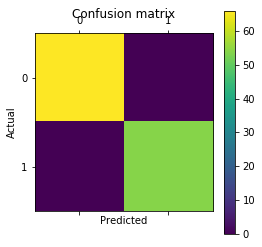

In [266]:
# Naive Bayes classifier
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, trainClass)
nbpreds_test = nbclf.predict(test)
# print nbpreds_test

print nbclf.score(train, trainClass)
print nbclf.score(test, testClass)

nbcm = confusion_matrix(np.array(testClass), nbpreds_test)#, labels=['Yes','No'])
print nbcm
# VISUALIZE USING MATPLOTLIB
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

d. Discuss your observations based on the above experiments.

All the classifiers performs with score of 100% which is very rare (too good to be true). Assumming the target class is not perfectly correlated with the variables,it is possible that the training and testing was by chance that makes the classifier be accurate. Stratified sampling and cross validation might help get a fair set for building the model.

## Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]
#### For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.

Your tasks in this problem are the following:

a. Preprocessing and data analysis:

Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
census = pd.read_csv('adult-modified.csv')
census = pd.read_csv('adult-modified.csv', na_values=['?'])

census.columns
census.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [125]:
print census.age.isnull().sum()
print census.workclass.isnull().sum()
print census.education.isnull().sum()
print census['marital-status'].isnull().sum()
print census.race.isnull().sum()
print census.sex.isnull().sum()
print census['hours-per-week'].isnull().sum()

# print census[19:20]
# print census[61:62]

198
588
0
0
0
0
0


In [126]:
# http://www.datacarpentry.org/python-ecology-lesson/02-index-slice-subset/
age_mean = census.age.mean()
# education_mean = census.education.mean()
# census.loc[:,'age'] = age_mean
census[census.age.isnull()].age = age_mean
census[census.workclass.isnull()]
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
census.dropna(axis=0, how='any', inplace=True)

print census.age.isnull().sum()+ census.workclass.isnull().sum()+ census.education.isnull().sum()+ census['marital-status'].isnull().sum()+ census.race.isnull().sum()+ census.sex.isnull().sum()+ census['hours-per-week'].isnull().sum()
census.head()

0


,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [22]:
# np.set_printoptions(precision=2, linewidth=100,suppress=True)
# pd.set_option('precision', 2)
# pd.set_option('display.float_format', '{:.2g}'.format)
pd.options.display.float_format = '{:20,.2f}'.format
census.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,"9,412.00",9412,"9,412.00",9412,9412,9412,"9,412.00",9412
unique,nan,3,nan,2,5,2,nan,2
top,nan,Private,nan,Married,White,Male,nan,<=50K
freq,nan,6947,nan,4737,8062,6383,nan,7093
mean,38.45,NaN,10.13,NaN,NaN,NaN,41.08,NaN
std,0.00,NaN,2.54,NaN,NaN,NaN,11.88,NaN
min,38.45,NaN,1.00,NaN,NaN,NaN,1.00,NaN
25%,38.45,NaN,9.00,NaN,NaN,NaN,40.00,NaN
50%,38.45,NaN,10.00,NaN,NaN,NaN,40.00,NaN
75%,38.45,NaN,13.00,NaN,NaN,NaN,45.00,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAB5BA8>,
      dtype=object)

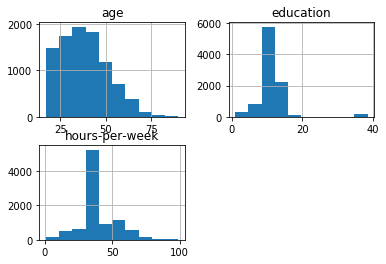

In [43]:
census.hist()

Age is right skewed, education is right skewed but with possible outliers, hours per week is close to normal distribution with a high peak near the center. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFD3B38>,
      dtype=object)

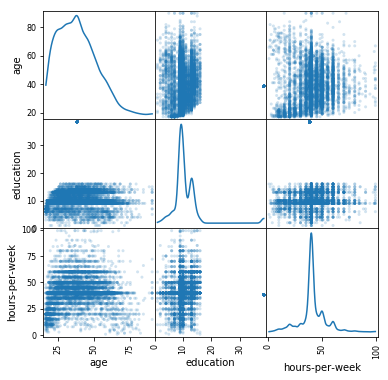

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(census, alpha=0.2, figsize=(6, 6), diagonal='kde')

The scatterplot better visualize the datapoints for each attrubutes. There is an outlier in every attrubute on the edges of the plots. This corresponds to the high peaks on the KDE.

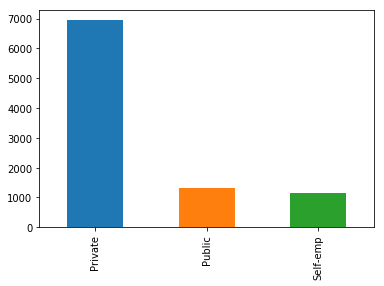

In [7]:
census['workclass'].value_counts().plot(kind='bar')

Most of the tuples are private. Public and self-employed has comparable frequencies.

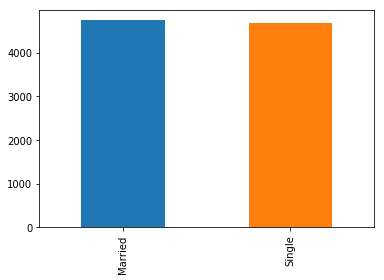

In [83]:
census['marital-status'].value_counts().plot(kind='bar')

Data points are close to evenly distributed for the Marital status attribute.

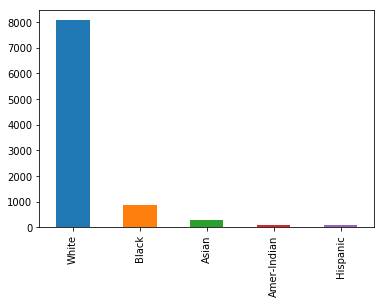

In [84]:
census['race'].value_counts().plot(kind='bar')

The White group is the majority. The rest falls into a comparable range.

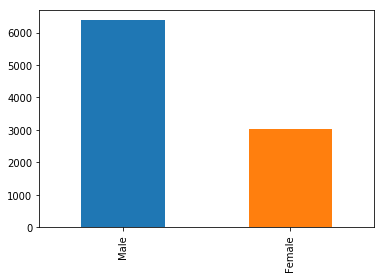

In [85]:
census['sex'].value_counts().plot(kind='bar')

The male group is around twice the number of females.

Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [320]:
# education+race, 
ct = pd.crosstab(census['education'], census['race'])
ct.head()
ct

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,35
3,0,4,5,1,70
4,5,5,13,6,147
5,0,3,19,2,114
6,8,3,30,4,223
7,4,6,47,4,255
8,0,2,17,3,75
9,34,66,341,23,2535


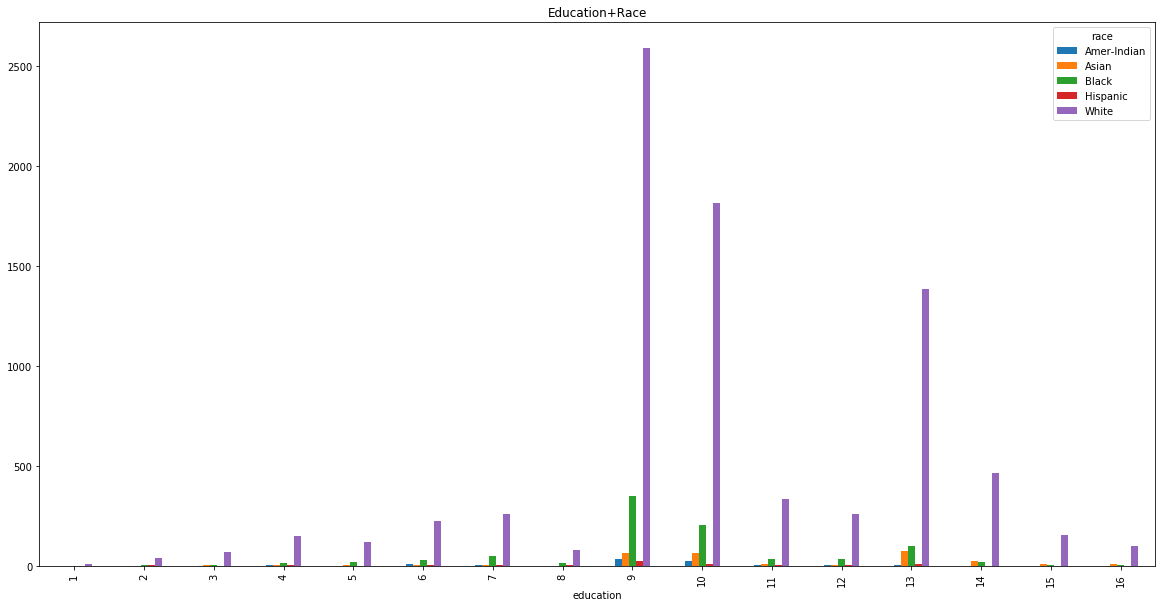

In [26]:
ct.plot(kind="bar", title="Education+Race",figsize=(20,10))

Each race groups follows similar distrubition, with the peak at 9-10 unit for education. Education of 8, 11 and 12 units seems to fluctuate a little. Perhaps 13 is the number of years of education for people taking Master's degree whereas 9-10 is bachelor's. The American-Indian group does not seem to have this bimodal trend but total number is very low to make inferences.

In [41]:
# work-class+income
ct = pd.crosstab(census['workclass'], census['income'])
ct

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


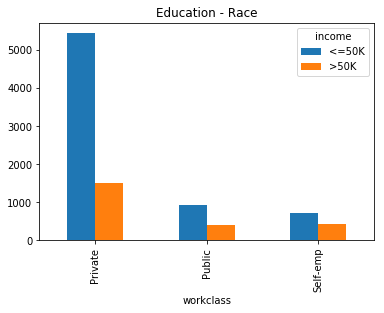

In [42]:
ct.plot(kind="bar", title="Education - Race")

The number of high income people to low income people is comparetively larger as moving from private to public and self-employed. Probablisticly, self-employed are likely to have high income.

In [43]:
#work-class+race, 
ct = pd.crosstab(census['workclass'], census['race'])
ct

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


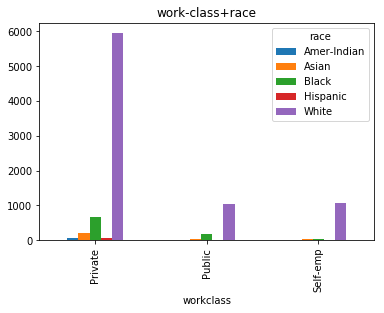

In [44]:
ct.plot(kind="bar", title="work-class+race")

Asian Hispanic White have similar distribution of workclass (slight difference in public and self-employ). There rest have small members in self-emp larger in public and largest in private

In [337]:
# and race+income 
ct = pd.crosstab(census['race'], census['income'])
ct
# ct['total'] = ct['<=50K'] + ct['>50K']
# pct = pd.concat((ct['<=50K']/ct['total'],ct['>50K']/ct['total']),axis=1)
# pct.columns = [['low','high']]
# pct
# ct.index

income,<=50K,>50K
race,,
Amer-Indian,80,9
Asian,219,66
Black,759,116
Hispanic,68,6
White,5831,2069


race
Amer-Indian    0.011702
Asian          0.031580
Black          0.108981
Hispanic       0.009728
White          0.838009
Name: <=50K, dtype: float64


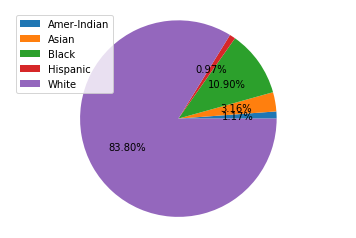

In [149]:
# create a table or chart showing percentages of each race category that fall in the low-income group
print ct['<=50K']/ct['<=50K'].sum()
plt.pie(ct['<=50K'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=ct.index)
# ct.plot(kind="bar", title="race+income")

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

income,<=50K,>50K
race,,
Amer-Indian,80,9
Asian,219,66
Black,759,116
Hispanic,68,6
White,5831,2069


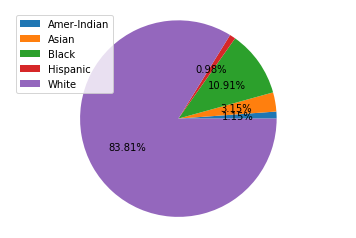

In [350]:
plt.pie(ct['<=50K'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=ct.index)
ct

In [345]:
pd.crosstab(census['sex'], census['income'])

income,<=50K,>50K
sex,,
Female,2624,356
Male,4333,1910


Categorial Variables
    income by sex: the ratio of female with high income to low income is smaller than the ratio of the male group.
    income by race: All the groups distribute the same way for income (compare the percentages)
    income by workclass: discussed in previous answer

Text(0.5,0.98,u'Income by education')

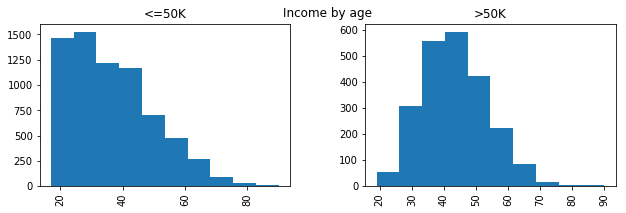

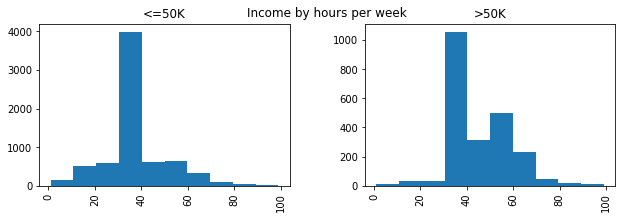

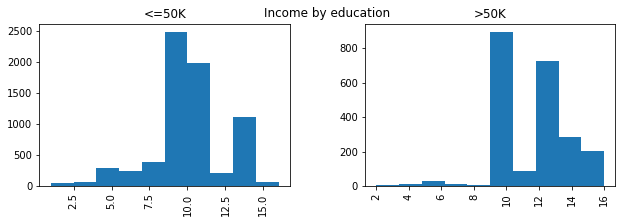

In [351]:
# Numeric Variables
census[['income','age']].hist(by=census['income'],figsize=(10,3))
plt.suptitle('Income by age')
census[['income','hours-per-week']].hist(by=census['income'],figsize=(10,3))
plt.suptitle('Income by hours per week')
census[['income','education']].hist(by=census['income'],figsize=(10,3))
plt.suptitle('Income by education')

Numeric Attributes comparing low vs high
    Income by age: rigth skewed vs centered. Low income has more younger people. High income has central tendancy of 40-50 years.
    Income by hours per week: Univariate vs bivariate. The low income has number of hours centered at 30-40. The high income has the same peak but with wider spread towards more number of hours.
    Income by education: comparable bimodal distribution

b. Predictive Modeling and Model Evaluation:
Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).
Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.
For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [381]:
# census_binarized = pd.get_dummies(census,
#     columns= ['workclass','marital-status','race','sex','income'])
# census_binarized.drop(['age','education'])
# census_binarized['age']
# type(census_binarized)
# drop(['income_<=50K'])drop(['income_<=50K'])
census_binarized = pd.get_dummies(census)
census_binarized.drop(['income_<=50K'], 1, inplace=True)
targetClass = census_binarized['income_>50K']
census_binarized.drop(['income_>50K'], 1, inplace=True)

# drop base level
census_binarized.drop(['age','workclass_Public','marital-status_Married','race_Amer-Indian','sex_Female'],1,inplace=True)
census_binarized.head()

,education,hours-per-week,workclass_Private,workclass_Self-emp,marital-status_Single,race_Asian,race_Black,race_Hispanic,race_White,sex_Male
0,13,40,0,0,1,0,0,0,1,1
1,13,13,0,1,0,0,0,0,1,1
2,9,40,1,0,1,0,0,0,1,1
3,7,40,1,0,0,0,1,0,0,1
4,13,40,1,0,0,0,1,0,0,0


Because LDA invoked warning of colinear variables, I removed one level of each dummy variables. I wasn't sure that sklearn will remove them so I did so, just in case.

In [310]:
# from sklearn.cross_validation import train_test_split
# train, test, trainClass, testClass = train_test_split(
#     census_binarized, targetClass, test_size=.2, random_state=33)
# print train.shape
# print test.shape
# train = census_binarized
# trainClass = targetClass

In [382]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import cross_validation

# Naive Bayes (Gaussian)
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, trainClass)
nbpreds_test = nbclf.predict(test)
nb_scores = cross_validation.cross_val_score(nbclf, census_binarized, targetClass, cv=10)

# decision tree (using "entropy" as selection criteria)
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
treeclf = treeclf.fit(train, trainClass)
treepreds_test = treeclf.predict(test)
tree_scores = cross_validation.cross_val_score(treeclf, census_binarized, targetClass, cv=10)

# linear discriminant analysis (LDA)
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, trainClass)
ldpreds_test = ldclf.predict(test)
lda_scores = cross_validation.cross_val_score(ldclf, census_binarized, targetClass, cv=10)

In [383]:
# print(classification_report(testClass, nbpreds_test))
# print(classification_report(testClass, treepreds_test))
# print(classification_report(testClass, ldpreds_test))

# nbcm = confusion_matrix(testClass, nbpreds_test)
# treecm = confusion_matrix(testClass, treepreds_test)
# ldacm = confusion_matrix(testClass, ldpreds_test)

# import pylab as plt
# %matplotlib inline
# plt.matshow(treecm)
# plt.title('Confusion matrix')
# plt.colorbar()
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

print("Overall Accuracy")
print("NB   : %0.2f (+/- %0.2f)" % (nb_scores.mean(), nb_scores.std() * 2))
print("TREE : %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("LDA  : %0.2f (+/- %0.2f)" % (lda_scores.mean(), lda_scores.std() * 2))

Overall Accuracy
NB   : 0.73 (+/- 0.02)
TREE : 0.80 (+/- 0.02)
LDA  : 0.81 (+/- 0.02)


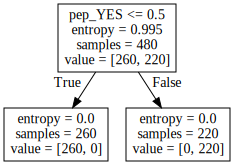

In [384]:
# generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='dt.dot', feature_names=train.columns)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Notes on Submission: You must submit your Jupyter Notebook (similar to examples in class) which includes your documented code, results of your interactions, and any discussions or explanations of the results. Please organize your notebook so that it's clear what parts of the notebook correspond to which problems in the assignment. Please submit the notebook in both IPYNB and HTML formats (along with any auxiliary files). Your assignment should be submitted via D2L.